In [2]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

## Analysis

In [26]:
data = pd.read_csv('data/train.csv')
print(data.shape)
data.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Target

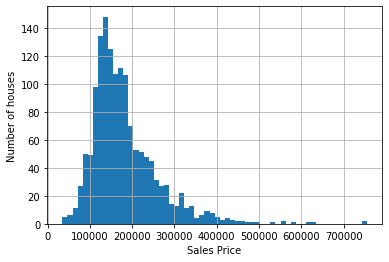

In [21]:
data['SalePrice'].hist(bins=60)
plt.ylabel('Number of houses')
plt.xlabel('Sales Price')
plt.show()

Target distribiution is skewed towards right. I can try to improve it using logarithmic transformation.

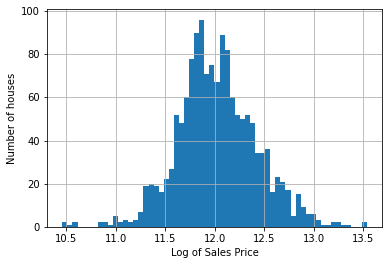

In [22]:
np.log(data['SalePrice']).hist(bins=60)
plt.ylabel('Number of houses')
plt.xlabel('Log of Sales Price')
plt.show()

Gaussian-ish distribiution is usally better for models.

### Variable Types

In [27]:
categorical = [col for col in data.columns if data[col].dtype == 'O'] #check for type *object*
#from Kaggle definitions of variables, I know that MSSubClass is also categorical
categorical += ['MSSubClass']
data[categorical] = data[categorical].astype('O')
print(f'Number of categorical: {len(categorical)}')

Number of categorical: 44


In [28]:
numerical = [col for col in data.columns if col not in categorical and col != 'SalePrice']
print(f'Number of numerical: {len(numerical)}') 

Number of numerical: 36
